In [1]:
import finlab
finlab.login(api_token='ID0hv1JVLP3bs86Qg/xslT1fwKjN0bclQVRCH7eQiAYh3e5/XNh77u3zaPDOOGJQ#vip_m')
from finlab import data
from finlab.backtest import sim
import pandas as pd
import plotly
import matplotlib

輸入成功!


In [2]:
benchmark = data.get('benchmark_return:發行量加權股價報酬指數', save_to_storage=True)
close = data.get('price:收盤價', save_to_storage=True)
volume = data.get('price:成交股數', save_to_storage=True)
monthly_rev = data.get('monthly_revenue:當月營收', save_to_storage = True)	
stock_fundamental = data.get('company_basic_info', save_to_storage = True)	
monthly_rev_YOY = data.get('monthly_revenue:去年同月增減(%)')	

 Use "pip install finlab==0.4.4" to update the latest version.


In [3]:
monthly_rev

,000116,000930,000960,0009A0,1101,1102,1103,1104,1107,1108,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2005-M01,NaN,NaN,NaN,NaN,2746766.0,1094966.0,271258.0,346111.0,9910.0,386000.0,...,43190.0,729712.0,36896.0,33813.0,144783.0,99732.0,86217.0,NaN,37254.0,NaN
2005-M02,NaN,NaN,NaN,NaN,1566092.0,663833.0,156962.0,203172.0,8378.0,185213.0,...,44905.0,729620.0,31515.0,24585.0,115451.0,52500.0,88619.0,NaN,35983.0,NaN
2005-M03,NaN,NaN,NaN,NaN,2504657.0,968271.0,234870.0,295127.0,21295.0,371569.0,...,51272.0,745498.0,33723.0,22733.0,130065.0,125257.0,120604.0,NaN,39668.0,NaN
2005-M04,NaN,NaN,NaN,NaN,2418388.0,876647.0,234952.0,301353.0,11769.0,372656.0,...,46557.0,498365.0,27414.0,25029.0,127739.0,86343.0,104614.0,NaN,42114.0,NaN
2005-M05,NaN,NaN,NaN,NaN,2394229.0,934672.0,221134.0,309846.0,11894.0,341375.0,...,49144.0,579833.0,28982.0,26062.0,155837.0,78049.0,106986.0,NaN,40487.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-M12,NaN,NaN,NaN,NaN,12584154.0,8340507.0,228644.0,725055.0,NaN,418326.0,...,198257.0,5195965.0,26801.0,29993.0,282439.0,506796.0,84115.0,1082675.0,58764.0,385673.0
2023-M01,NaN,NaN,NaN,NaN,7325221.0,4814494.0,191217.0,504378.0,NaN,294901.0,...,155326.0,1671450.0,18769.0,15119.0,262023.0,368737.0,83424.0,689192.0,59256.0,281173.0
2023-M02,NaN,NaN,NaN,NaN,7306069.0,6241236.0,211050.0,591525.0,NaN,361748.0,...,216690.0,2778101.0,60061.0,12803.0,191612.0,411041.0,84196.0,758703.0,61630.0,312305.0


In [4]:
condition1 = monthly_rev > monthly_rev.shift(1).rolling(52).max()
condition2 = (monthly_rev_YOY + monthly_rev_YOY.shift(1) + monthly_rev_YOY.shift(2)) / 3 > 0.1
condition3 = monthly_rev > 100000
condition4 = (monthly_rev_YOY > 0.05) & (monthly_rev_YOY.shift(1) > 0.05) + (monthly_rev_YOY.shift(2) > 0.05)
conditions = condition1 & condition2 & condition3 & condition4

In [19]:
import finlab
finlab.login(api_token='ID0hv1JVLP3bs86Qg/xslT1fwKjN0bclQVRCH7eQiAYh3e5/XNh77u3zaPDOOGJQ#vip_m')
from finlab import data
from finlab.backtest import sim
import pandas as pd
benchmark = data.get('benchmark_return:發行量加權股價報酬指數', save_to_storage=True)
close = data.get('price:收盤價', save_to_storage=True)
volume = data.get('price:成交股數', save_to_storage=True)
monthly_rev = data.get('monthly_revenue:當月營收', save_to_storage = True)	
stock_fundamental = data.get('company_basic_info', save_to_storage = True)	
monthly_rev_YOY = data.get('monthly_revenue:去年同月增減(%)')	
condition1 = monthly_rev > monthly_rev.shift(1).rolling(52).max()
condition2 = (monthly_rev_YOY + monthly_rev_YOY.shift(1) + monthly_rev_YOY.shift(2)) / 3 > 0.1
condition3 = monthly_rev > 100000
condition4 = (monthly_rev_YOY > 0.05) & (monthly_rev_YOY.shift(1) > 0.05) + (monthly_rev_YOY.shift(2) > 0.05)
condition5 = (close == close.rolling(20).max()).sustain(5,2)
conditions = condition1 & condition2 & condition3 & condition4 
position= conditions*monthly_rev_YOY.is_largest(60)
report = sim(position=position, stop_loss=0.3, position_limit=0.25, fee_ratio=1.425/1000*0.3,name="月營收大成長策略", live_performance_start='2023-02-10', mae_mfe_window=40)
print(report.get_stats(resample='1d', riskfree_rate=0.02)['daily_sharpe'])
print(report.get_stats(resample='1d', riskfree_rate=0.02)['max_drawdown'])
report.display()
report.display_mae_mfe_analysis()

輸入成功!


1.063541576539889
-0.3913397793593134


--Stats--
annualized_rate_of_return     30.04%
sharpe                          1.06
max_drawdown                 -39.13%
win_ratio                     49.58%

--Latest Position--


2734    0.25
3046    0.25
3661    0.25
4967    0.25
Name: 2023-05-10 00:00:00, dtype: float64

c:\Program Files\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Text(0, 0.5, 'gmfe')

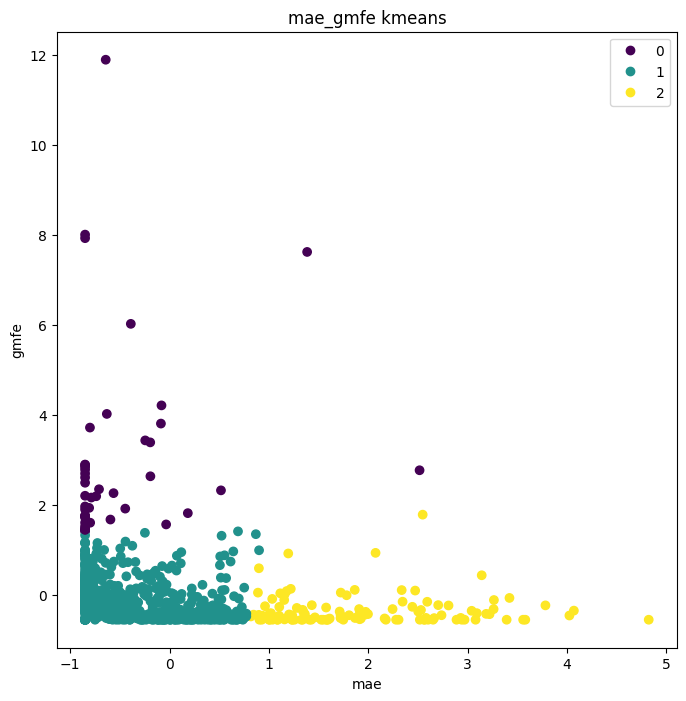

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

def scale_data(data):
    scaler = StandardScaler().fit(data)
    X_scaled = scaler.transform(data)
    return X_scaled

# report.trades['mae'] = report.trades['mae'][report.trades['mae'].notnull()]
scale_mae = scale_data((-report.trades['mae'].values).reshape(-1, 1))
scale_gmfe = scale_data(report.trades['gmfe'].values.reshape(-1, 1))


plt.figure(figsize = (8, 8))
random_state = 100
X = np.hstack((scale_mae,scale_gmfe))
X = X[~np.isnan(X).any(axis=1)]
y_pred = KMeans(n_clusters=3,random_state=random_state).fit_predict(X)

scatter = plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.legend(*scatter.legend_elements())
plt.title("mae_gmfe kmeans")
plt.xlabel("mae")
plt.ylabel("gmfe")

In [7]:
cluster_trades = report.trades.copy()
cluster_trades['group'] = y_pred
cluster_trades['stock_id'] = cluster_trades['stock_id'].apply(lambda s:s[:s.index(' ')])
# ana_targets = cluster_trades[cluster_trades['group'].isin([0,2])]
ana_targets = cluster_trades
ana_targets = ana_targets.reset_index().set_index(['stock_id', 'entry_sig_date'])

In [8]:
close = data.get('price:收盤價')
open = data.get('price:開盤價')	
high = data.get('price:最高價')	
low = data.get('price:最低價')
volume = data.get('price:成交股數', save_to_storage=True)

In [9]:
負債比率=data.get('fundamental_features:負債比率').deadline()
存貨週轉率=data.get('fundamental_features:存貨週轉率').deadline()
ROE稅後=data.get('fundamental_features:ROE稅後').deadline()
營收成長率=data.get('fundamental_features:營收成長率').deadline()
融資使用率=data.get('margin_transactions:融資使用率').fillna(0)
融券使用率=data.get('margin_transactions:融券使用率').fillna(0)

外陸資買賣超股數 = data.get('institutional_investors_trading_summary:外陸資買賣超股數(不含外資自營商)')	
外資自營商買賣超股數 = data.get('institutional_investors_trading_summary:外資自營商買賣超股數')
投信買賣超股數	= data.get('institutional_investors_trading_summary:投信買賣超股數')
自營商買賣超股數 = data.get('institutional_investors_trading_summary:自營商買賣超股數(自行買賣)')
自營商買賣超避險 = data.get('institutional_investors_trading_summary:自營商買賣超股數(避險)')
當日沖銷交易成交股數 = data.get('intraday_trading:當日沖銷交易成交股數')
當日沖銷交易買進成交金額 = data.get('intraday_trading:當日沖銷交易買進成交金額')
當日沖銷交易賣出成交金額 = data.get('intraday_trading:當日沖銷交易賣出成交金額')
集保人數 = data.get('inventory')
本益比	= data.get('price_earning_ratio:本益比')	
股價淨值比	= data.get('price_earning_ratio:股價淨值比')	
庫藏股買回總金額 = data.get('treasury_stock:本次已買回總金額')


rsi = data.indicator('rsi', timeperiod = 20)
atr = data.indicator('atr', adjust_price=True, resample='D',timeperiod=10)
adosc = data.indicator("adosc",adjust_price=False, resample="D", fastperiod=3,slowperiod=10)
upper_band = close > data.indicator("bbands", timeperiod=10)[0]
sma10 = close > close.rolling(window=10).mean()
sma20 = close > close.rolling(window=20).mean()
sma60 = close > close.rolling(window=60).mean()
vol20 = volume > volume.rolling(window=20).mean()
vol60 = volume > volume.rolling(window=60).mean()
macd = close.ewm(span=12, adjust=False).mean() - close.ewm(span=26, adjust=False).mean()
vol_cumsum = volume.rolling(20).sum()
lower_shadow = abs(close-open)/(open-low)

pct_change = close.pct_change()
profit = pct_change.rolling(20).mean()
risk = pct_change.rolling(20).std()
sharpe = profit / risk * (252 ** 0.5)

sheep = (close - close.shift(5)) / close.shift(5) 

atr = data.indicator('atr', adjust_price=True,timeperiod=10)
adj_close = data.get('etl:adj_close')
entry_volatility = atr/adj_close


features={'負債比率':負債比率,'存貨週轉率':存貨週轉率,'ROE稅後':ROE稅後,'營收成長率':營收成長率,'融資使用率':融資使用率,'融券使用率':融券使用率,'entry_volatility':entry_volatility,
          '外陸資買賣超股數':外陸資買賣超股數, '外資自營商買賣超股數':外資自營商買賣超股數, '投信買賣超股數':投信買賣超股數, '自營商買賣超避險':自營商買賣超避險, '自營商買賣超股數':自營商買賣超股數, 'RSI':rsi, 'ADOSC':adosc,
          'ADOSC':adosc, '布林通道上緣':upper_band, '10日均線':sma10, '20日均線':sma20, 'sma60':sma60, 'vol20':vol20,'vol60':vol60, 'macd':macd, 'vol_cumsum':vol_cumsum, 'lower_shadow':lower_shadow, '夏普':sharpe, 'sheep':sheep}

def unstack_feat(col,feat):
    reindex_date = list(set(ana_targets.index.get_level_values(1)))
    df= feat.reindex(reindex_date,method='ffill')
    df = df.unstack().to_frame()
    df.columns=[col]
    df=df.replace(np.inf,np.nan)
    return df

feats_df = pd.concat([unstack_feat(k,v) for k,v in features.items()],axis=1)
dataset = pd.concat([feats_df,ana_targets[['group']]],axis=1)
dataset.index.names = ['stock_id','date']
dataset=dataset.dropna()
dataset

負債比率     存貨週轉率      ROE稅後       營收成長率  融資使用率  融券使用率  \
stock_id date                                                                   
1229     2019-09-10  21.361595  1.450920   0.639948   60.195799   0.45   0.00   
1316     2017-10-11  55.686313  0.057268  -1.763236   12.331860  68.86   0.30   
1325     2020-04-10   5.907543  1.172544   0.402548  -30.162877  27.90   0.00   
1416     2016-04-11  57.655739  0.054817  -1.249240  -76.653998   8.18   0.00   
         2015-01-12  52.764484  0.015844   3.655621  -45.949505  10.05   0.00   
...                        ...       ...        ...         ...    ...    ...   
9938     2019-01-10  59.094874  0.379387   2.627667   -0.263827   9.14   0.21   
9940     2017-05-10  60.667455  0.201813   6.136850    3.338765   1.82   0.02   
9958     2020-07-10  52.915203  0.895421   1.879565  195.155504  31.84   1.70   
         2020-03-10  44.888224  0.574952  10.906938   32.607591  30.03   3.00   
9962     2022-04-11  35.407592  0.661852   5.300939   98.909523  36.99   0.65   

                     entry_volatility   外陸資買賣超股數  外資自營商買賣超股數   投信買賣超股數  ...  \
stock_id date                                                           ...   
1229     2019-09-10          0.012984  -223000.0         0.0       0.0  ...   
1316     2017-10-11          0.040903  -173000.0         0.0       0.0  ...   
1325     2020-04-10          0.057253 -1054000.0         0.0       0.0  ...   
1416     2016-04-11          0.019080   -15000.0         0.0       0.0  ...   
         2015-01-12          0.019758   -63000.0         0.0       0.0  ...   
...                               ...        ...         ...       ...  ...   
9938     2019-01-10          0.028844 -1101172.0         0.0   60000.0  ...   
9940     2017-05-10          0.012401    65287.0         0.0   73000.0  ...   
9958     2020-07-10          0.030451   307000.0         0.0 -687000.0  ...   
         2020-03-10          0.033492  1343000.0         0.0  224000.0  ...   
9962     2022-04-11          0.043624  -419000.0         0.0       0.0  ...   

                     20日均線  sma60  vol20  vol60      macd   vol_cumsum  \
stock_id date                                                            
1229     2019-09-10  False  False  False  False -1.046504   51114467.0   
1316     2017-10-11  False   True   True   True  0.579717   37121106.0   
1325     2020-04-10   True   True  False   True  3.320885  239007067.0   
1416     2016-04-11   True   True   True   True  0.332716   10766582.0   
         2015-01-12   True   True   True   True  0.316901   19310541.0   
...                    ...    ...    ...    ...       ...          ...   
9938     2019-01-10   True   True   True   True  0.280553   34134369.0   
9940     2017-05-10   True   True   True   True  0.143522    5188490.0   
9958     2020-07-10  False  False   True   True -0.956619   83054906.0   
         2020-03-10   True   True   True   True  2.522345  130997456.0   
9962     2022-04-11   True   True   True   True  0.969476  132242300.0   

                    lower_shadow        夏普     sheep group  
stock_id date                                               
1229     2019-09-10     1.000000 -3.385355 -0.002933   1.0  
1316     2017-10-11     1.000000  1.726889 -0.032609   2.0  
1325     2020-04-10     0.933333  3.412316  0.196406   0.0  
1416     2016-04-11     1.000000  4.254426  0.021108   1.0  
         2015-01-12     0.909091  6.578669  0.045845   1.0  
...                          ...       ...       ...   ...  
9938     2019-01-10     2.000000  3.484286  0.055336   1.0  
9940     2017-05-10     5.000000  1.392284  0.012912   1.0  
9958     2020-07-10     0.333333 -3.052819  0.004717   0.0  
         2020-03-10     2.923077  6.116310  0.066581   1.0  
9962     2022-04-11     0.625000  5.653996  0.077482   2.0  

[321 rows x 26 columns]

In [10]:
test_select = dataset.index.get_level_values('date') > '2019'
dataset_train = dataset[~test_select]
dataset_test = dataset[test_select]
dataset_test

負債比率     存貨週轉率      ROE稅後       營收成長率  融資使用率  融券使用率  \
stock_id date                                                                   
1229     2019-09-10  21.361595  1.450920   0.639948   60.195799   0.45   0.00   
1325     2020-04-10   5.907543  1.172544   0.402548  -30.162877  27.90   0.00   
1436     2020-01-10  75.576633  0.013376  -0.879200  -83.958251   3.26   0.27   
         2022-09-12  81.459781  0.054167   3.417383  -45.238934   2.33   0.23   
         2021-06-10  76.638145  0.035822   3.029694    7.272611   1.73   0.00   
...                        ...       ...        ...         ...    ...    ...   
8942     2021-07-12  33.729514  0.792723   4.490840   37.749723   4.10   0.12   
9938     2019-01-10  59.094874  0.379387   2.627667   -0.263827   9.14   0.21   
9958     2020-07-10  52.915203  0.895421   1.879565  195.155504  31.84   1.70   
         2020-03-10  44.888224  0.574952  10.906938   32.607591  30.03   3.00   
9962     2022-04-11  35.407592  0.661852   5.300939   98.909523  36.99   0.65   

                     entry_volatility   外陸資買賣超股數  外資自營商買賣超股數   投信買賣超股數  ...  \
stock_id date                                                           ...   
1229     2019-09-10          0.012984  -223000.0         0.0       0.0  ...   
1325     2020-04-10          0.057253 -1054000.0         0.0       0.0  ...   
1436     2020-01-10          0.015476    15000.0         0.0       0.0  ...   
         2022-09-12          0.013083    -1000.0         0.0       0.0  ...   
         2021-06-10          0.014208     1000.0         0.0       0.0  ...   
...                               ...        ...         ...       ...  ...   
8942     2021-07-12          0.027905  -195955.0         0.0   40000.0  ...   
9938     2019-01-10          0.028844 -1101172.0         0.0   60000.0  ...   
9958     2020-07-10          0.030451   307000.0         0.0 -687000.0  ...   
         2020-03-10          0.033492  1343000.0         0.0  224000.0  ...   
9962     2022-04-11          0.043624  -419000.0         0.0       0.0  ...   

                     20日均線  sma60  vol20  vol60      macd   vol_cumsum  \
stock_id date                                                            
1229     2019-09-10  False  False  False  False -1.046504   51114467.0   
1325     2020-04-10   True   True  False   True  3.320885  239007067.0   
1436     2020-01-10   True   True  False   True  1.419374    4544154.0   
         2022-09-12   True  False  False  False -0.567842    1529170.0   
         2021-06-10   True   True  False  False  0.101395     600938.0   
...                    ...    ...    ...    ...       ...          ...   
8942     2021-07-12   True   True   True   True  2.291311   32828005.0   
9938     2019-01-10   True   True   True   True  0.280553   34134369.0   
9958     2020-07-10  False  False   True   True -0.956619   83054906.0   
         2020-03-10   True   True   True   True  2.522345  130997456.0   
9962     2022-04-11   True   True   True   True  0.969476  132242300.0   

                    lower_shadow        夏普     sheep group  
stock_id date                                               
1229     2019-09-10     1.000000 -3.385355 -0.002933   1.0  
1325     2020-04-10     0.933333  3.412316  0.196406   0.0  
1436     2020-01-10     1.600000  9.281551  0.038319   1.0  
         2022-09-12     1.000000 -0.582267  0.000000   1.0  
         2021-06-10     0.444444  1.691032 -0.002506   1.0  
...                          ...       ...       ...   ...  
8942     2021-07-12     0.961538  2.939392  0.044295   1.0  
9938     2019-01-10     2.000000  3.484286  0.055336   1.0  
9958     2020-07-10     0.333333 -3.052819  0.004717   0.0  
         2020-03-10     2.923077  6.116310  0.066581   1.0  
9962     2022-04-11     0.625000  5.653996  0.077482   2.0  

[172 rows x 26 columns]

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# find high mae label
label = ana_targets[-ana_targets['mae']> ana_targets['gmfe']]['group'].values[0]
features_name = list(features.keys())
cf = DecisionTreeClassifier(max_depth=3)
cf.fit(dataset_train[features_name], dataset_train['group'] ==label)

DecisionTreeClassifier(max_depth=3)

f1_score: 0.7410714285714286
precision_score(p): 0.9540229885057471
recall_score(p): 0.6058394160583942


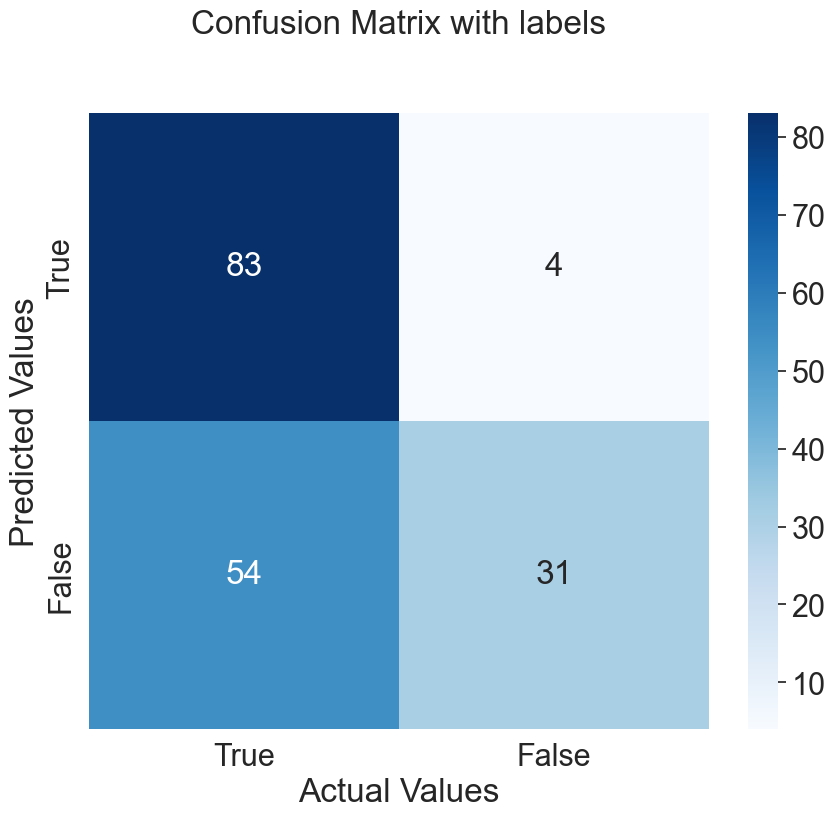

In [12]:
import pandas as pd
from sklearn import metrics
import seaborn as sns


prediction = cf.predict(dataset_test[features_name])
confusion_matrix = metrics.confusion_matrix(dataset_test['group'] == label, prediction)
tn, fp, fn, tp = confusion_matrix.ravel()
confusion_matrix=np.array([[tp, fp],[fn,tn]])



print('f1_score:',metrics.f1_score(dataset_test['group'] == label, prediction))
print('precision_score(p):',metrics.precision_score(dataset_test['group'] == label, prediction))
print('recall_score(p):',metrics.recall_score(dataset_test['group'] == label, prediction))


plt.figure(figsize=(10, 8))
sns.set(font_scale=2)

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

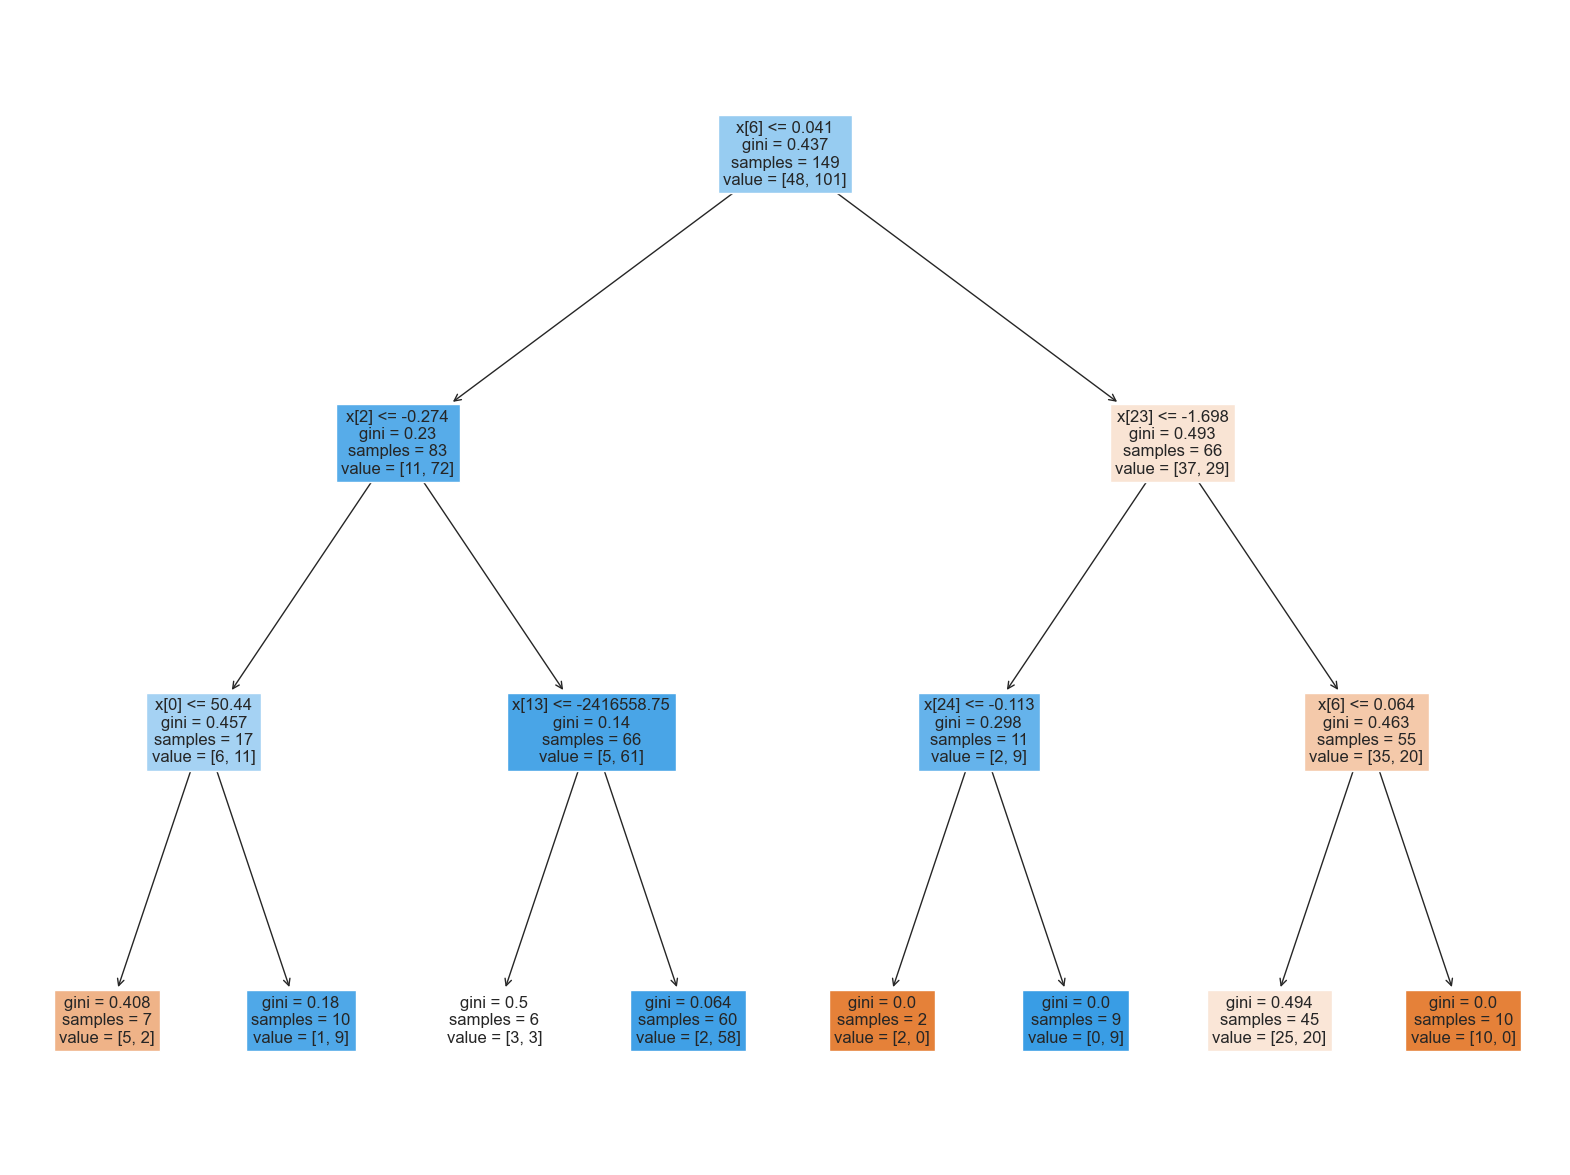

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(cf, fontsize=12,filled=True,)
plt.show()

In [14]:
print(features_name[6],features_name[3],features_name[2])

entry_volatility 營收成長率 ROE稅後


In [15]:
importance = pd.Series(cf.feature_importances_, index=features_name).sort_values(ascending=False)
importance

entry_volatility    0.533286
夏普                  0.120911
sheep               0.104467
負債比率                0.099195
ADOSC               0.075835
ROE稅後               0.066306
融資使用率               0.000000
10日均線               0.000000
lower_shadow        0.000000
vol_cumsum          0.000000
macd                0.000000
vol60               0.000000
vol20               0.000000
sma60               0.000000
20日均線               0.000000
布林通道上緣              0.000000
融券使用率               0.000000
存貨週轉率               0.000000
自營商買賣超股數            0.000000
自營商買賣超避險            0.000000
投信買賣超股數             0.000000
外資自營商買賣超股數          0.000000
外陸資買賣超股數            0.000000
營收成長率               0.000000
RSI                 0.000000
dtype: float64

In [16]:
atr = data.indicator('atr', adjust_price=True,timeperiod=10)
adj_close = data.get('etl:adj_close')
entry_volatility = atr/adj_close
entry_volatility = entry_volatility[entry_volatility.index >= '2012-01-01']

In [24]:
position = (position & (entry_volatility <=0.04))
position = position[position.index >= '2018-09-01']
report = sim(position=position, stop_loss=0.15, touched_exit=True, position_limit=0.33, fee_ratio=1.425/1000*0.3,name="月營收創高低波動進場", live_performance_start='2023-02-10', mae_mfe_window=40)
print(report.get_stats(resample='1d', riskfree_rate=0.02)['daily_sharpe'])
print(report.get_stats(resample='1d', riskfree_rate=0.02)['max_drawdown'])
report.display()
report.display_mae_mfe_analysis()

1.3605990783772788
-0.18428689842932588


--Stats--
annualized_rate_of_return     29.31%
sharpe                          1.36
max_drawdown                 -18.43%
win_ratio                     51.99%

--Latest Position--


Series([], Name: 2023-05-18 00:00:00, dtype: float64)

In [ ]:
report.trades['return'].min()

-0.15